## Importación de librerias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                      
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import plotly.express as px

In [3]:
# Normalización
scaler_min_max = MinMaxScaler()

# Estandarización
scaler_standard = StandardScaler()

## Lectura de base de datos

In [4]:
df = pd.read_csv(r'C:\Users\EMMY\Desktop\Talento Tech\Proyecto\Limpieza\Base Agrícola 2006-2023.csv')

## Características en total del data set

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16354 entries, 0 to 16353
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Departamento       16354 non-null  object 
 1   Municipio          16354 non-null  object 
 2   Grupo cultivo      16354 non-null  object 
 3   Subgrupo           16354 non-null  object 
 4   Cultivo            16354 non-null  object 
 5   Año                16354 non-null  int64  
 6   Area sembrada      16354 non-null  float64
 7   Area cosechada     16354 non-null  float64
 8   Producción         16354 non-null  float64
 9   Rendimiento        16092 non-null  float64
 10  Ciclo del cultivo  16354 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 1.4+ MB


In [6]:
df['Año'] = df['Año'].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16354 entries, 0 to 16353
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Departamento       16354 non-null  object  
 1   Municipio          16354 non-null  object  
 2   Grupo cultivo      16354 non-null  object  
 3   Subgrupo           16354 non-null  object  
 4   Cultivo            16354 non-null  object  
 5   Año                16354 non-null  category
 6   Area sembrada      16354 non-null  float64 
 7   Area cosechada     16354 non-null  float64 
 8   Producción         16354 non-null  float64 
 9   Rendimiento        16092 non-null  float64 
 10  Ciclo del cultivo  16354 non-null  object  
dtypes: category(1), float64(4), object(6)
memory usage: 1.3+ MB


# TRATAR LOS DATOS FALTANTES

In [8]:
df.isna().sum()

Departamento           0
Municipio              0
Grupo cultivo          0
Subgrupo               0
Cultivo                0
Año                    0
Area sembrada          0
Area cosechada         0
Producción             0
Rendimiento          262
Ciclo del cultivo      0
dtype: int64

## Localizar las filas que tienen valores Nulos

In [9]:
# Ver filas con valores NaN
df_NaN = df[df.isna().any(axis=1)]
df_NaN.head()

,Departamento,Municipio,Grupo cultivo,Subgrupo,Cultivo,Año,Area sembrada,Area cosechada,Producción,Rendimiento,Ciclo del cultivo
325,BOLÍVAR,ALTOS DEL ROSARIO,OTROS PERMANENTES,CACAO,CACAO,2007,20.0,0.0,0.0,NaN,PERMANENTE
326,BOLÍVAR,ALTOS DEL ROSARIO,OTROS PERMANENTES,CACAO,CACAO,2008,32.0,0.0,0.0,NaN,PERMANENTE
335,BOLÍVAR,ALTOS DEL ROSARIO,OTROS PERMANENTES,CACAO,CACAO,2017,20.0,0.0,0.0,NaN,PERMANENTE
336,BOLÍVAR,ALTOS DEL ROSARIO,OTROS PERMANENTES,CACAO,CACAO,2018,20.0,0.0,0.0,NaN,PERMANENTE
483,BOLÍVAR,ARENAL,OLEAGINOSAS,PALMA DE ACEITE,PALMA DE ACEITE,2007,85.0,0.0,0.0,NaN,PERMANENTE


In [10]:
# Ver valores únicos de 'Area cosechada' en df_NaN
df_NaN['Area cosechada'].unique()

array([0.])

In [11]:
# Ver valores únicos de 'Producción' en df_NaN
df_NaN['Producción'].unique()

array([0.])

In [12]:
df_NaN['Ciclo del cultivo'].unique()

array(['PERMANENTE', 'TRANSITORIO', 'ANUAL'], dtype=object)

## Rellenar NaN y Comprobar si aún nos falta algún valor

In [13]:
# Rendimiento = Producción/Area cosechada   0/0=indefinido ¿Se puede poner el rendimiento como 0 en los resgistros NaN?

df['Rendimiento'] = df['Rendimiento'].fillna(0)
df.isna().sum().sum()

0

# UN ANÁLISIS ESTADÍSTICO BÁSICO DE LOS DATOS

In [14]:
df.describe()

,Area sembrada,Area cosechada,Producción,Rendimiento
count,16354.000000,16354.000000,16354.000000,16354.000000
mean,457.268609,400.398965,2206.952635,6.381803
std,937.883988,854.824803,6395.996295,7.456641
min,0.000000,0.000000,0.000000,0.000000
25%,25.000000,19.000000,76.000000,1.500000
50%,125.000000,100.000000,400.000000,4.000000
75%,460.000000,400.000000,1600.000000,9.000000
max,11950.000000,13321.000000,156260.000000,100.470000


In [15]:
df.describe(include='object')

,Departamento,Municipio,Grupo cultivo,Subgrupo,Cultivo,Ciclo del cultivo
count,16354,16354,16354,16354,16354,16354
unique,2,101,14,65,81,3
top,BOLÍVAR,CARTAGENA DE INDIAS,CEREALES,MAIZ,MAIZ,TRANSITORIO
freq,8374,394,5555,2103,2103,10316


In [16]:
as0 = df[df['Area sembrada'] == 0]
as0

,Departamento,Municipio,Grupo cultivo,Subgrupo,Cultivo,Año,Area sembrada,Area cosechada,Producción,Rendimiento,Ciclo del cultivo
567,BOLÍVAR,ARENAL,RAÍCES Y TUBÉRCULOS,RAÍCES Y TUBÉRCULOS,YUCA,2022,0.0,180.0,1080.0,6.00,TRANSITORIO
768,BOLÍVAR,ARROYOHONDO,RAÍCES Y TUBÉRCULOS,RAÍCES Y TUBÉRCULOS,ÑAME,2022,0.0,68.0,340.0,5.00,TRANSITORIO
770,BOLÍVAR,ARROYOHONDO,RAÍCES Y TUBÉRCULOS,RAÍCES Y TUBÉRCULOS,ÑAME,2023,0.0,70.0,350.0,5.00,TRANSITORIO
777,BOLÍVAR,ARROYOHONDO,RAÍCES Y TUBÉRCULOS,RAÍCES Y TUBÉRCULOS,YUCA,2022,0.0,275.0,2200.0,8.00,TRANSITORIO
779,BOLÍVAR,ARROYOHONDO,RAÍCES Y TUBÉRCULOS,RAÍCES Y TUBÉRCULOS,YUCA,2023,0.0,230.0,1840.0,8.00,TRANSITORIO
...,...,...,...,...,...,...,...,...,...,...,...
15643,CÓRDOBA,SAN PELAYO,LEGUMINOSAS,LEGUMINOSAS,FRIJOL,2022,0.0,120.0,120.0,1.00,TRANSITORIO
15915,CÓRDOBA,TIERRALTA,CEREALES,CEREALES,ARROZ,2022,0.0,4200.0,12516.0,2.98,TRANSITORIO
15919,CÓRDOBA,TIERRALTA,CEREALES,CEREALES,ARROZ,2023,0.0,2500.0,7450.0,2.98,TRANSITORIO
16078,CÓRDOBA,TUCHÍN,RAÍCES Y TUBÉRCULOS,RAÍCES Y TUBÉRCULOS,YUCA,2022,0.0,420.0,3360.0,8.00,TRANSITORIO


In [17]:
as0[(as0['Area sembrada'] == 0) & (as0['Area cosechada'] == 0)]
# ¿205 registros donde no hay Area sembrada pero si hay Area cosechada? Qué se hace con estos registros?

,Departamento,Municipio,Grupo cultivo,Subgrupo,Cultivo,Año,Area sembrada,Area cosechada,Producción,Rendimiento,Ciclo del cultivo


In [18]:
as0['Ciclo del cultivo'].unique()

array(['TRANSITORIO'], dtype=object)

# Detecting Outliers

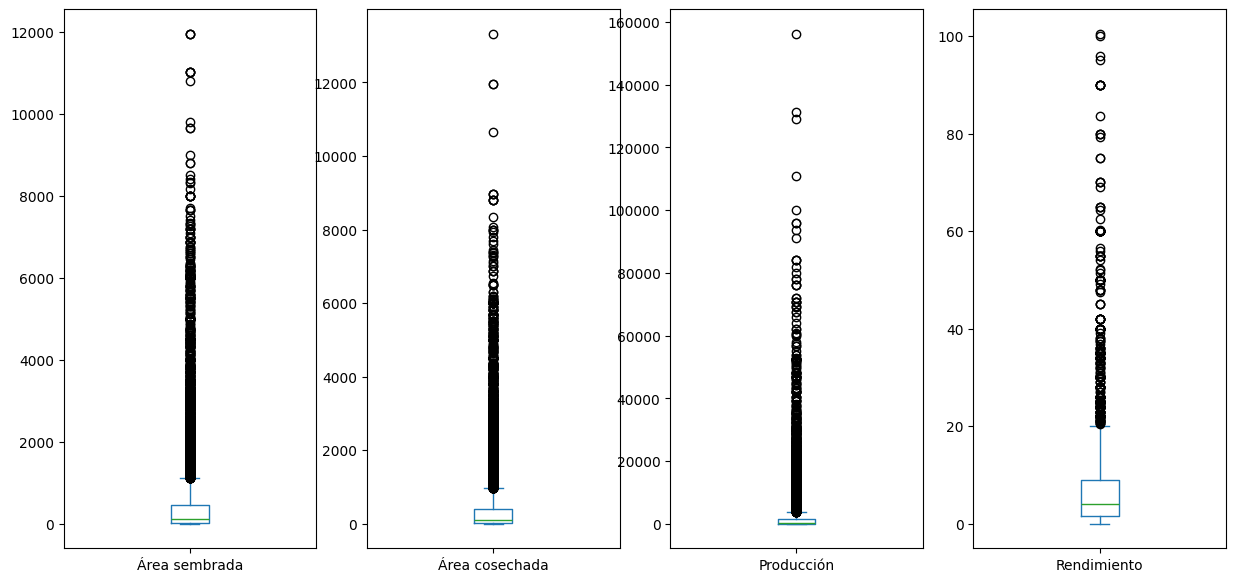

In [19]:
df.plot.box(subplots=True, figsize=(15,7))
plt.show()

# Normalización y Escalado de Datos

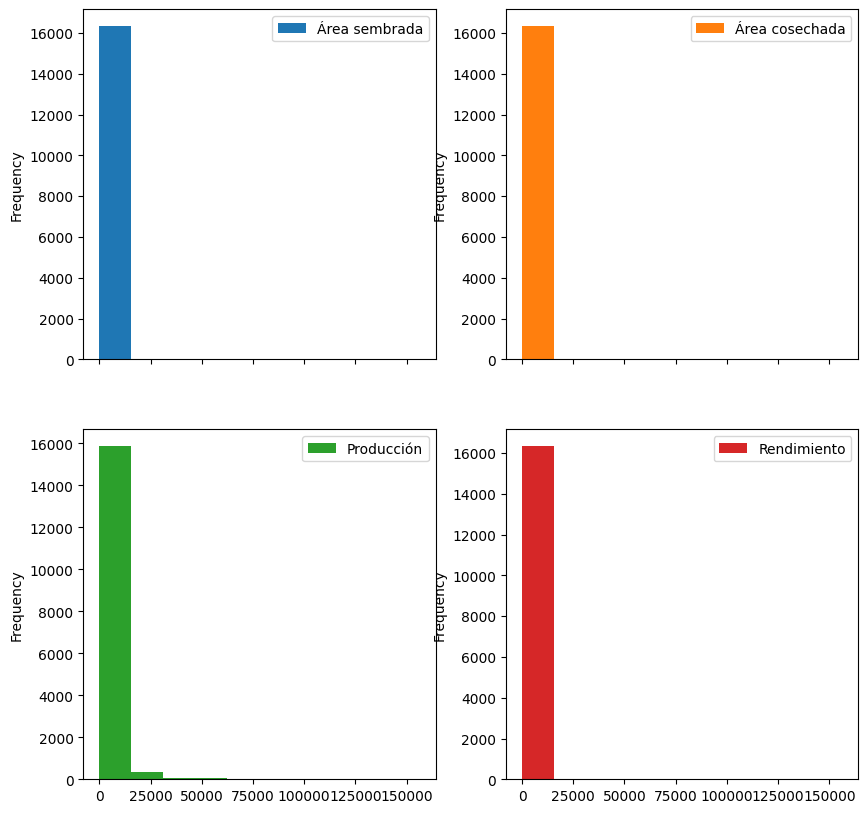

In [20]:
df.plot.hist(subplots=True, layout=(2,2), figsize=(10,10))
plt.show()

In [21]:
fig = px.histogram(df, x='Area sembrada', nbins=20)
fig.show()

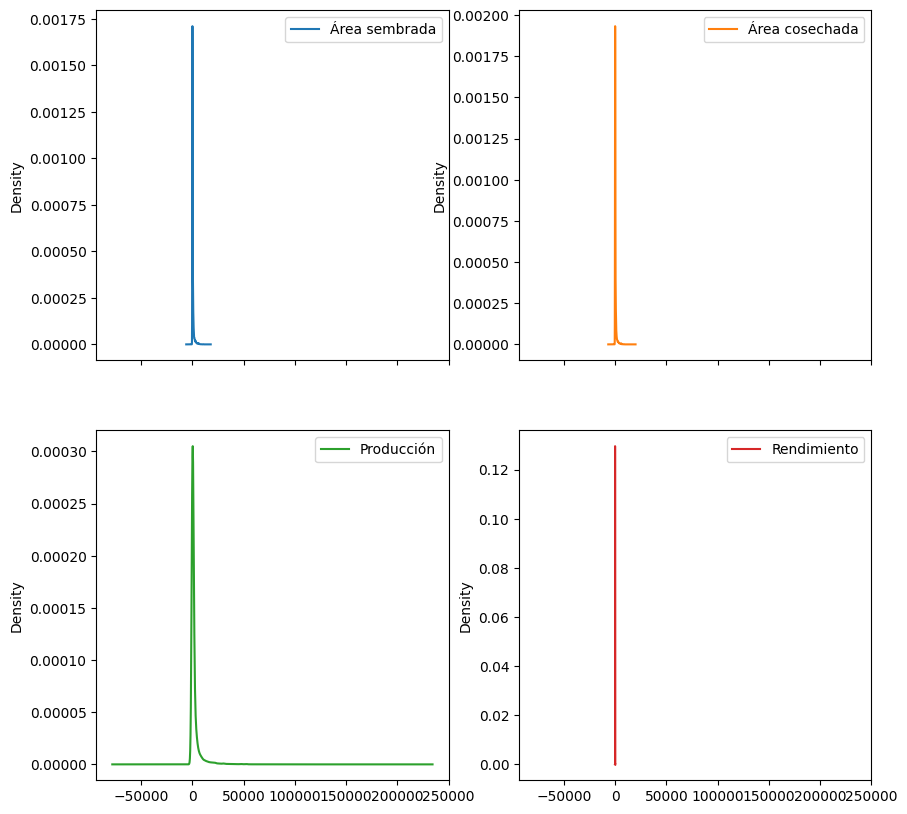

In [22]:
df.plot.kde(subplots=True, layout=(2,2), figsize=(10,10))
plt.show()

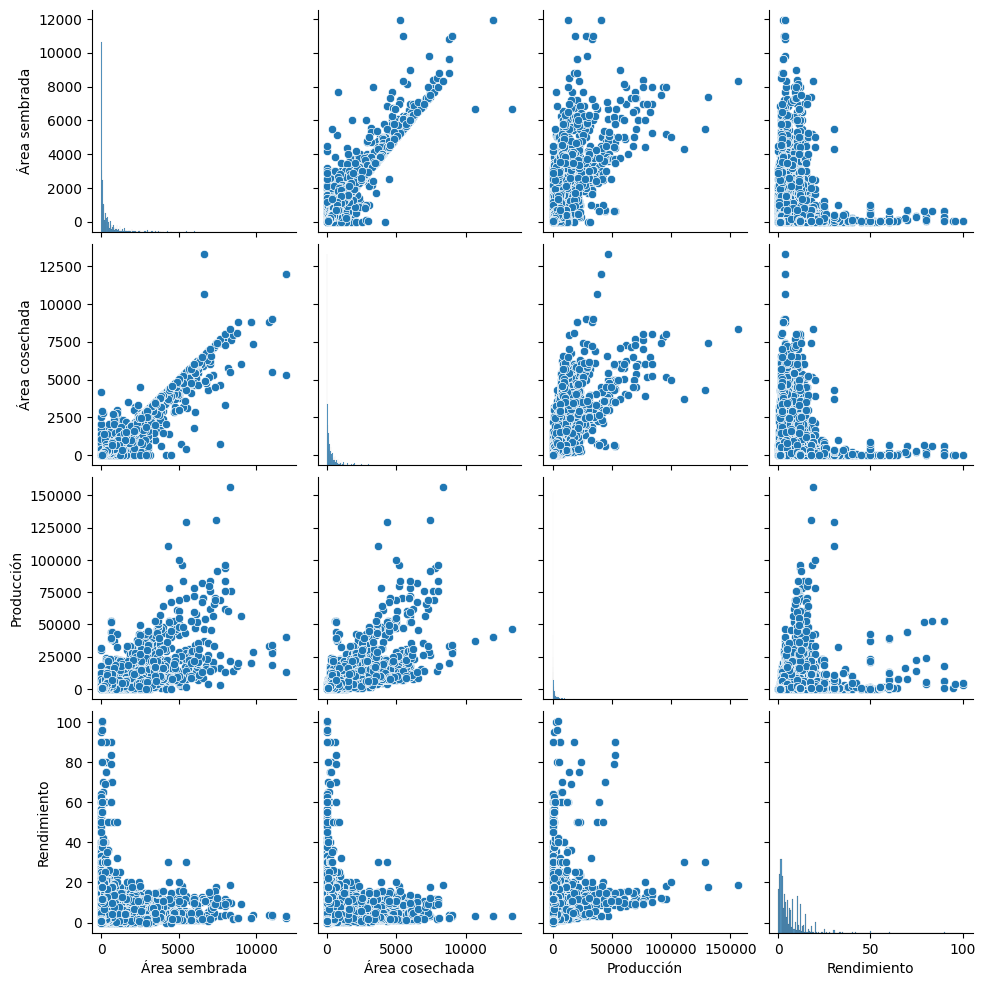

In [23]:
# Crear scatter plots para todas las combinaciones de variables numéricas
sns.pairplot(df)

# Mostrar los gráficos
plt.show()

In [24]:
# 1. Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include='float64')

# 2. Normalizar las columnas numéricas
scaler_min_max = MinMaxScaler()
norm = pd.DataFrame(scaler_min_max.fit_transform(df_numeric), columns=df_numeric.columns)

# 3. Estandarizar las columnas numéricas
scaler_standard = StandardScaler()
est = pd.DataFrame(scaler_standard.fit_transform(df_numeric), columns=df_numeric.columns)

# 1. Seleccionar las columnas categóricas o no numéricas
df_non_numeric = df.drop(columns=df_numeric.columns)

# 2. Combinar las columnas categóricas con las columnas numéricas normalizadas
df_normalized = pd.concat([df_non_numeric.reset_index(drop=True), norm.reset_index(drop=True)], axis=1)

# 3. Combinar las columnas categóricas con las columnas numéricas estandarizadas
df_standardized = pd.concat([df_non_numeric.reset_index(drop=True), est.reset_index(drop=True)], axis=1)

Text(0.5, 1.0, 'Valores estandarizados')

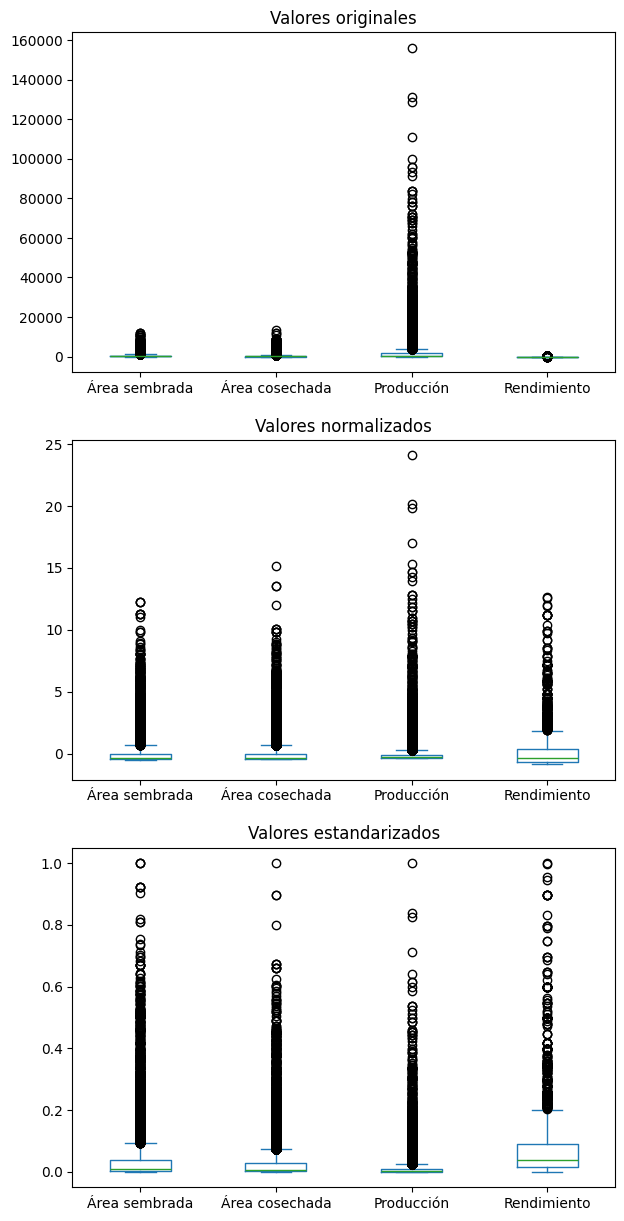

In [25]:
# Crear subplots para agrupar de 3 en 3
fig, axes = plt.subplots(3, 1, figsize=(7, 15))  # 3 filas, 1 columna

df.plot.box(ax=axes[0])
axes[0].set_title('Valores originales')
df_standardized.plot.box(ax=axes[1])
axes[1].set_title('Valores normalizados')
df_normalized.plot.box(ax=axes[2])
axes[2].set_title('Valores estandarizados')

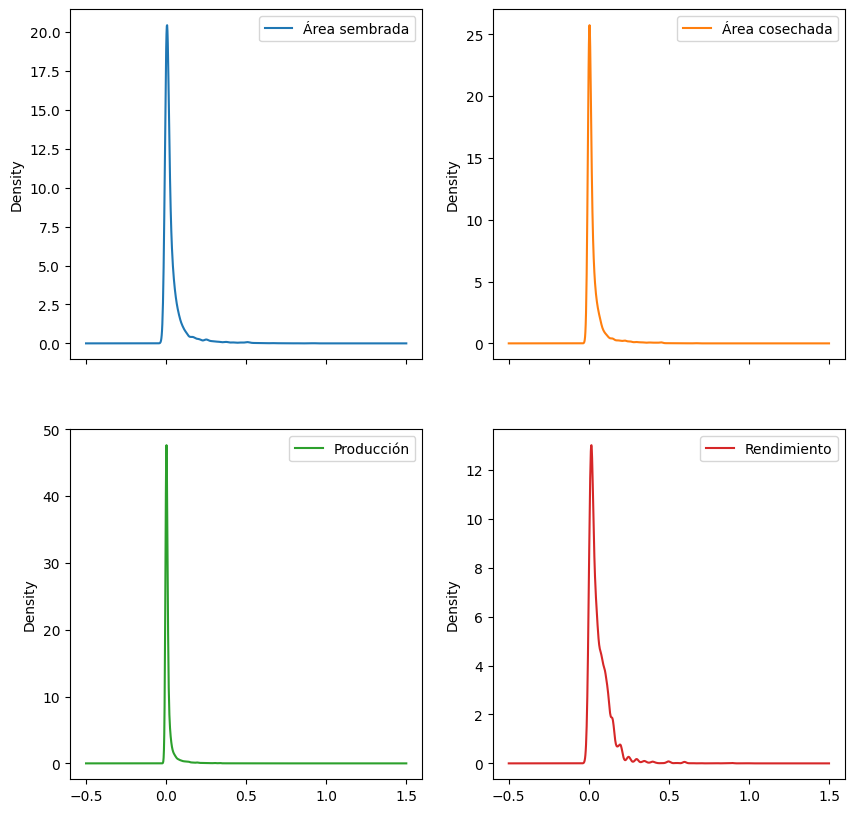

In [26]:
df_normalized.plot.kde(subplots=True, layout=(2,2), figsize=(10,10))
plt.show()

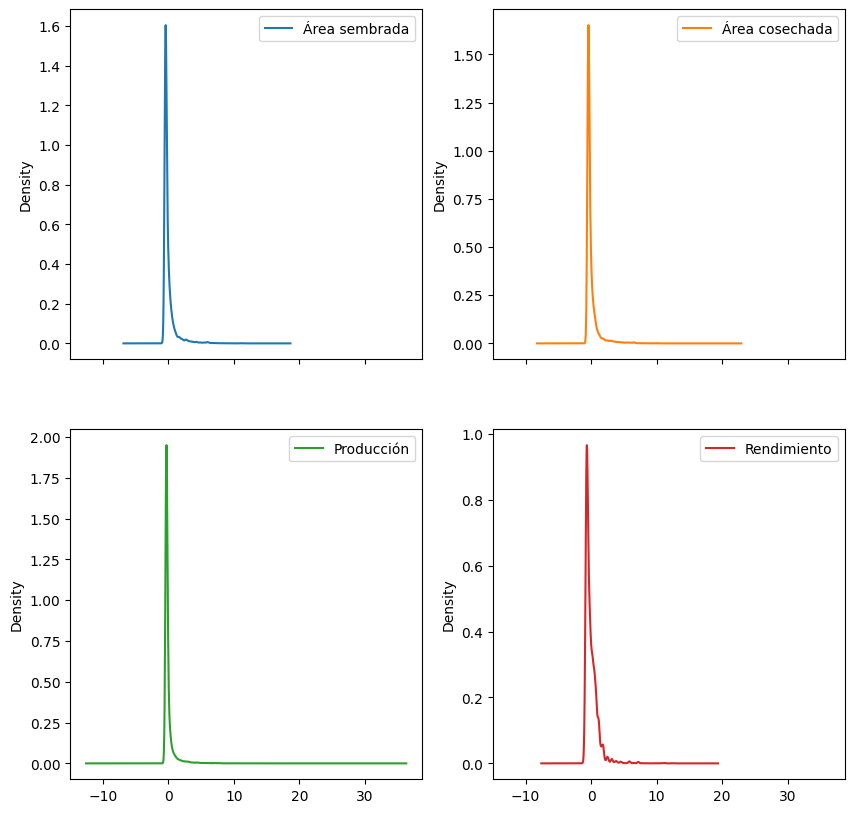

In [27]:
df_standardized.plot.kde(subplots=True, layout=(2,2), figsize=(10,10))
plt.show()

# Gráficos Unidimensionales

In [28]:
df.columns

Index(['Departamento', 'Municipio', 'Grupo cultivo', 'Subgrupo', 'Cultivo',
       'Año', 'Area sembrada', 'Area cosechada', 'Producción', 'Rendimiento',
       'Ciclo del cultivo'],
      dtype='object')

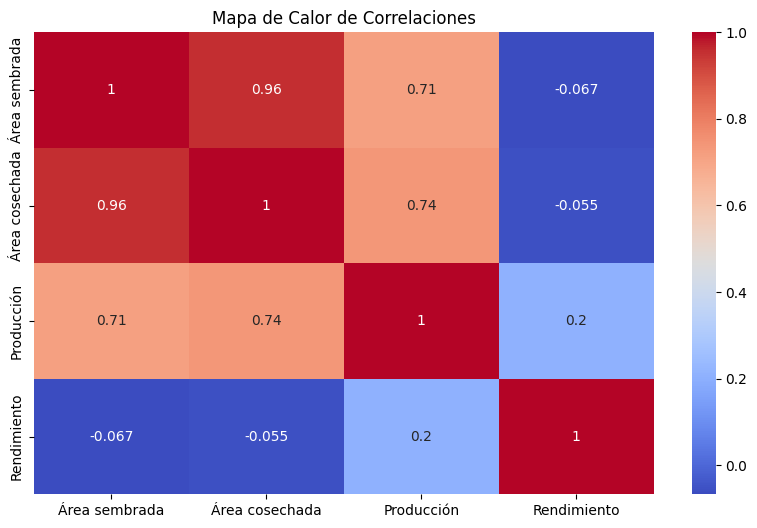

In [29]:
plt.figure(figsize=(10,6))
corr = df[['Area sembrada', 'Area cosechada', 'Producción', 'Rendimiento']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

In [30]:
df_cultivo = df.groupby(['Departamento', 'Cultivo'])[['Area sembrada', 'Area cosechada', 'Producción']].sum().reset_index()
df_cultivo

,Departamento,Cultivo,Area sembrada,Area cosechada,Producción
0,BOLÍVAR,ACHIOTE,118.00,98.00,184.00
1,BOLÍVAR,AGUACATE,55610.00,47663.50,490280.99
2,BOLÍVAR,AHUYAMA,26744.50,22632.50,238639.46
3,BOLÍVAR,AJI,9587.00,8405.00,62126.00
4,BOLÍVAR,AJONJOLI,23309.00,20499.00,15799.00
...,...,...,...,...,...
128,CÓRDOBA,SOYA,1650.00,1200.00,2700.00
129,CÓRDOBA,TOMATE,203.50,193.00,2926.90
130,CÓRDOBA,YUCA,430992.80,380759.75,4790686.60
131,CÓRDOBA,ZAPOTE,14.00,4.00,190.00


In [31]:
df_cultivo.loc[df_cultivo.groupby('Departamento')['Producción'].idxmax()]

,Departamento,Cultivo,Area sembrada,Area cosechada,Producción
64,BOLÍVAR,YUCA,687026.86,586814.85,5731352.2
130,CÓRDOBA,YUCA,430992.80,380759.75,4790686.6


In [32]:
df.columns

Index(['Departamento', 'Municipio', 'Grupo cultivo', 'Subgrupo', 'Cultivo',
       'Año', 'Area sembrada', 'Area cosechada', 'Producción', 'Rendimiento',
       'Ciclo del cultivo'],
      dtype='object')

In [33]:
df_anual = df.groupby('Año',observed=False)[['Area sembrada', 'Area cosechada', 'Producción']].sum().reset_index()
df_anual['Rendimiento'] = df_anual['Producción']/df_anual['Area cosechada']
df_anual

,Año,Area sembrada,Area cosechada,Producción,Rendimiento
0,2006,127586.00,110445.00,268568.00,2.431690
1,2007,364880.00,306332.00,1682657.00,5.492919
2,2008,387795.00,330269.00,1750514.00,5.300267
3,2009,394867.00,345743.00,1877278.00,5.429692
4,2010,423682.00,322131.00,1660907.00,5.155999
5,2011,420598.00,355769.00,1830597.00,5.145465
6,2012,457413.00,404718.00,2054386.00,5.076092
7,2013,491421.00,440188.00,2226128.00,5.057221
8,2014,476794.00,406576.00,2020567.00,4.969715
9,2015,442729.00,359787.00,1811922.00,5.036096


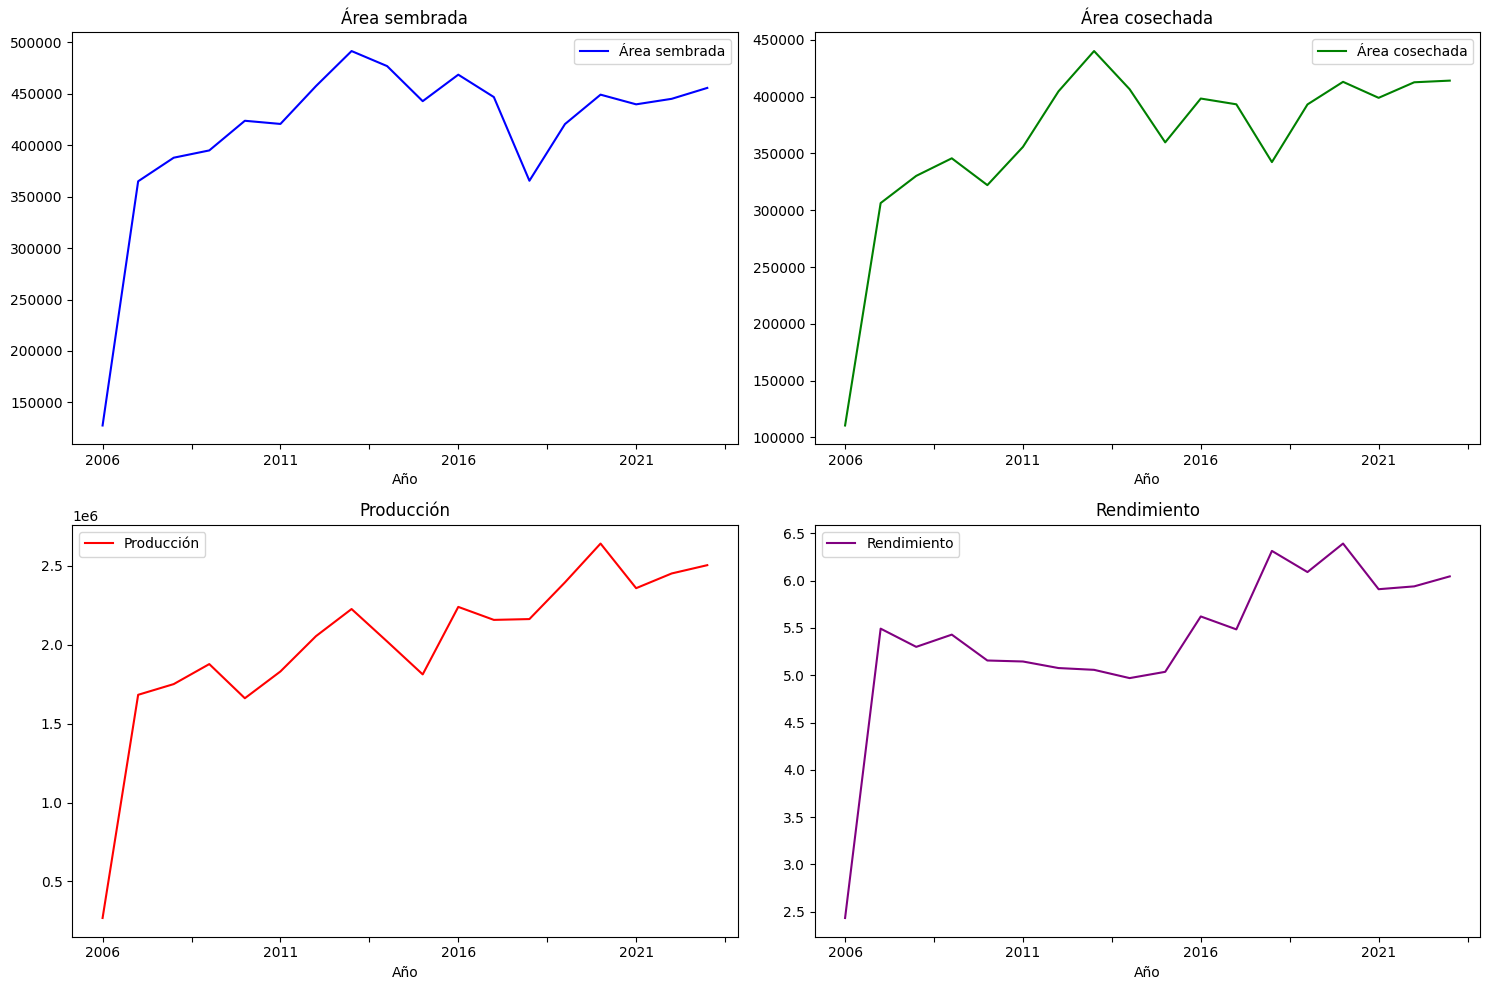

In [34]:
# Configurar los subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Graficar
df_anual.plot.line(x='Año', y='Area sembrada', ax=axes[0,0], color='blue', title='Area sembrada')
df_anual.plot.line(x='Año', y='Area cosechada', ax=axes[0,1], color='green', title='Area cosechada')
df_anual.plot.line(x='Año', y='Producción', ax=axes[1,0], color='red', title='Producción')
df_anual.plot.line(x='Año', y='Rendimiento', ax=axes[1,1], color='purple', title='Rendimiento')

# Ajustar el diseño para que no se superpongan
plt.tight_layout()

plt.show()

In [35]:
df_dpto_anual = df.groupby(['Departamento','Año'],observed=False)[['Area sembrada', 'Area cosechada', 'Producción']].sum().reset_index()
df_dpto_anual['Rendimiento'] = df_dpto_anual['Producción']/df_dpto_anual['Area cosechada']

In [36]:
# Columna 'Año' sea categórica (discreta)
# df_dpto_anual['Año'] = df_dpto_anual['Año'].astype('category')

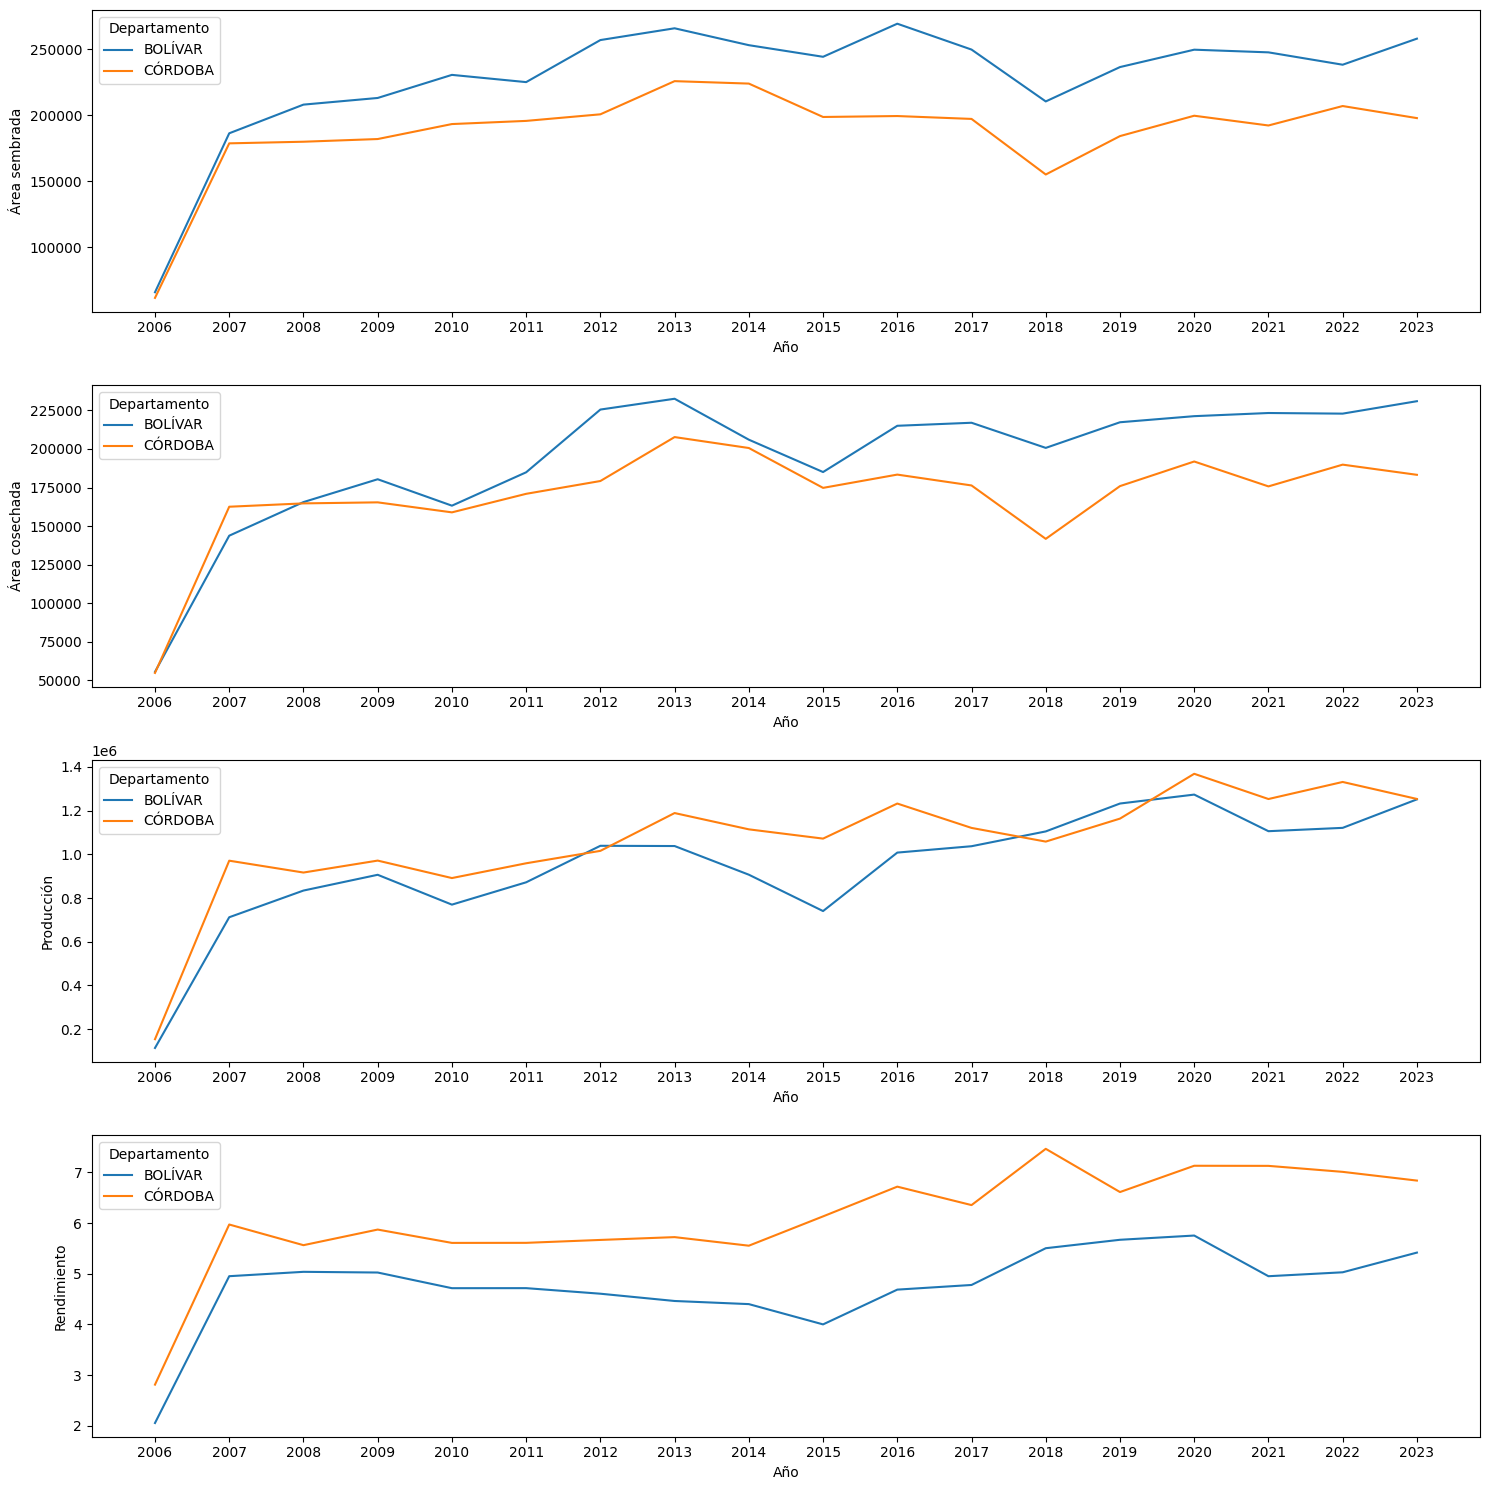

In [37]:
# Configurar los subplots 2x2
fig, axes = plt.subplots(4, 1, figsize=(15, 15))

# Graficar
sns.lineplot(data=df_dpto_anual, x='Año', y='Area sembrada', ax=axes[0], hue='Departamento', palette='tab10')
sns.lineplot(data=df_dpto_anual, x='Año', y='Area cosechada', ax=axes[1], hue='Departamento', palette='tab10')
sns.lineplot(data=df_dpto_anual, x='Año', y='Producción', ax=axes[2], hue='Departamento', palette='tab10')
sns.lineplot(data=df_dpto_anual, x='Año', y='Rendimiento', ax=axes[3], hue='Departamento', palette='tab10')

# Ajustar las etiquetas del eje X
for ax in axes.flatten():
    ax.set_xticks(df_dpto_anual['Año'].unique()) 
    
# Ajustar el diseño para que no se superpongan
plt.tight_layout()

plt.show()

In [38]:
df.columns

Index(['Departamento', 'Municipio', 'Grupo cultivo', 'Subgrupo', 'Cultivo',
       'Año', 'Area sembrada', 'Area cosechada', 'Producción', 'Rendimiento',
       'Ciclo del cultivo'],
      dtype='object')

In [43]:
fig = px.histogram(df, x='Grupo cultivo', color= 'Departamento',title='Tasa de Rotación por Género')
fig.show()

In [ ]:
df.info